# Exploratory Data Analysis (EDA) for the Exasens Project

## 1. Load the File in Python
First, we load the data file `Exasens_Kaggle.csv` into a `pandas` DataFrame to start working with it.

In [94]:
import pandas as pd

# Cargargamos el archivo CSV con el path que tengamos
file_path = '/Users/pepedesintas/EDA_ExasensDataset/Exasens_Kaggle.csv'

#Guardamos el contenido en una variable:
#Función de pandas que nos mete la info del CSV en un Dataframe de la libreria pandas
exasens_data = pd.read_csv(file_path) 

## 2. Initial Data Exploration

### 2.1. Review the First Rows and Basic Structure of the Dataset
We examine the first rows, general information, and descriptive statistics to better understand the structure of the data.

In [97]:
# Display the first rows of the dataset:
#útil para obtener una primera visión del contenido del conjunto de datos 
#incluye los nombres de las columnas y los primeros valores de cada una
#imprime en forma de tabla los 5 primeros valores
display(exasens_data.head()) 
print("\n" + "="*100 + "\n")#separador

# Show general information about the dataset:
#Detalla ino del Dataset, nº de columnas, de filas, tipo de dato de cada columna y cuantos datos tengo en cada fila
#Tenemos enteros, floats y objetos (diagnostico = tipo enfermedad y ID)
exasens_data.info()
print("\n" + "="*100 + "\n")

# Display descriptive statistics for numerical columns
display(exasens_data.describe())

,Diagnosis,ID,Imagery_part_min,Imagery_part_avg,Real_part_min,Real_part_avg,Gender,Age,Smoking
0,COPD,301-4,-320.61,-300.563531,-495.26,-464.171991,1,77,2
1,COPD,302-3,-325.39,-314.750360,-473.73,-469.263140,0,72,2
2,COPD,303-3,-323.00,-317.436056,-476.12,-471.897667,1,73,3
3,COPD,304-4,-327.78,-317.399670,-473.73,-468.856388,1,76,2
4,COPD,305-4,-325.39,-316.155785,-478.52,-472.869783,0,65,2




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Diagnosis         399 non-null    object 
 1   ID                399 non-null    object 
 2   Imagery_part_min  100 non-null    float64
 3   Imagery_part_avg  100 non-null    float64
 4   Real_part_min     100 non-null    float64
 5   Real_part_avg     100 non-null    float64
 6   Gender            399 non-null    int64  
 7   Age               399 non-null    int64  
 8   Smoking           399 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 28.2+ KB




,Imagery_part_min,Imagery_part_avg,Real_part_min,Real_part_avg,Gender,Age,Smoking
count,100.000000,100.000000,100.000000,100.000000,399.000000,399.000000,399.000000
mean,-314.941800,-304.779677,-473.002200,-458.701666,0.398496,48.736842,1.726817
std,28.422753,25.834316,49.009819,43.725345,0.490203,18.566962,0.742167
min,-337.350000,-328.280985,-626.860000,-473.928698,0.000000,17.000000,1.000000
25%,-327.780000,-318.476799,-476.120000,-470.036232,0.000000,31.000000,1.000000
50%,-323.000000,-314.327176,-473.730000,-467.136002,0.000000,49.000000,2.000000
75%,-320.610000,-305.072319,-468.950000,-462.804774,1.000000,64.000000,2.000000
max,-225.000000,-225.000000,-44.000000,-44.000000,1.000000,93.000000,3.000000


## 3. Data Cleaning

### 3.1. Handling Missing Values and Duplicated Values
We impute or drop missing values as appropriate.
We remove any duplicate rows to ensure that there are no repeated data.

In [100]:
#Ver valores nulos
missing_values = exasens_data.isnull().sum()
print("All Null-Values we have:\n", missing_values)

#Seleccionar solo las columnas numéricas
numerical_columns = exasens_data.select_dtypes(include=['number']).columns

#Rellenar los valores nulos solo en columnas numéricas con la MEDIA
exasens_data[numerical_columns] = exasens_data[numerical_columns].fillna(exasens_data[numerical_columns].mean())

#Resultado
missing_values_after = exasens_data.isnull().sum()
print("\n" + "="*50 + "\n")
print("Null-values after filling out:\n", missing_values_after)

# Eliminar duplicados
exasens_data.drop_duplicates(inplace=True)
print("\n" + "="*50 + "\n")
print("Number of duplicated values: ", exasens_data.duplicated().sum())

All Null-Values we have:
 Diagnosis             0
ID                    0
Imagery_part_min    299
Imagery_part_avg    299
Real_part_min       299
Real_part_avg       299
Gender                0
Age                   0
Smoking               0
dtype: int64


Null-values after filling out:
 Diagnosis           0
ID                  0
Imagery_part_min    0
Imagery_part_avg    0
Real_part_min       0
Real_part_avg       0
Gender              0
Age                 0
Smoking             0
dtype: int64


Number of duplicated values:  0


### 3.2. Confirming Data Cleaning
We check again for any missing values or duplicates to confirm that the cleaning process was effective.

In [103]:
# Verificar nuevamente valores nulos y duplicados
print(exasens_data.isnull().sum())
print("\n" + "="*50 + "\n")
print("Number of duplicated values: ", exasens_data.duplicated().sum())
print("\n" + "="*50 + "\n")
print(exasens_data.info())

Diagnosis           0
ID                  0
Imagery_part_min    0
Imagery_part_avg    0
Real_part_min       0
Real_part_avg       0
Gender              0
Age                 0
Smoking             0
dtype: int64


Number of duplicated values:  0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Diagnosis         399 non-null    object 
 1   ID                399 non-null    object 
 2   Imagery_part_min  399 non-null    float64
 3   Imagery_part_avg  399 non-null    float64
 4   Real_part_min     399 non-null    float64
 5   Real_part_avg     399 non-null    float64
 6   Gender            399 non-null    int64  
 7   Age               399 non-null    int64  
 8   Smoking           399 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 28.2+ KB
None


## 4. Examine Distributions of Numerical and Categorical Variables
We visualize the distribution of key variables to get an initial understanding of the data, especially for variables such as `Age` and `Diagnosis`.

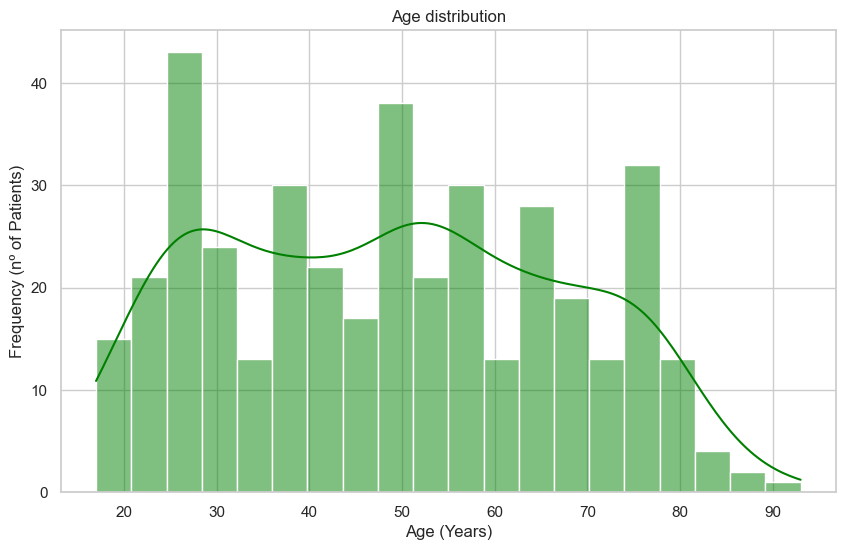

/var/folders/_6/y65qx_ln445314xzkc_slzmc0000gn/T/ipykernel_52375/1590140801.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=exasens_data, x='Diagnosis', palette="viridis")


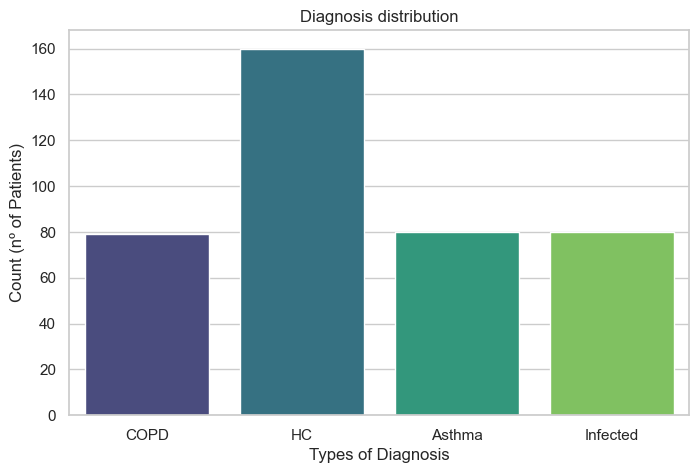

/var/folders/_6/y65qx_ln445314xzkc_slzmc0000gn/T/ipykernel_52375/1590140801.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=exasens_data, x='Gender', palette="pastel")


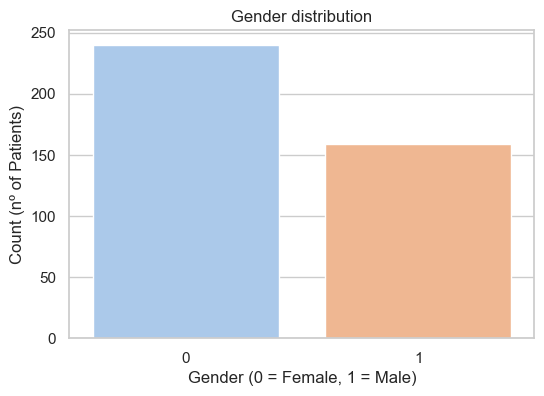

/var/folders/_6/y65qx_ln445314xzkc_slzmc0000gn/T/ipykernel_52375/1590140801.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=exasens_data, x='Smoking', palette="magma")


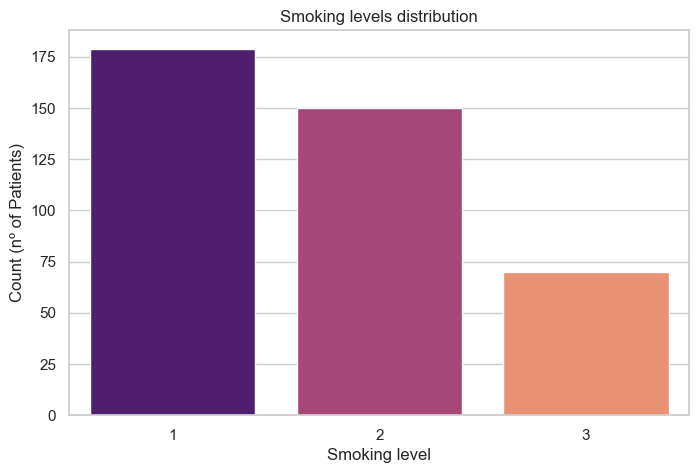

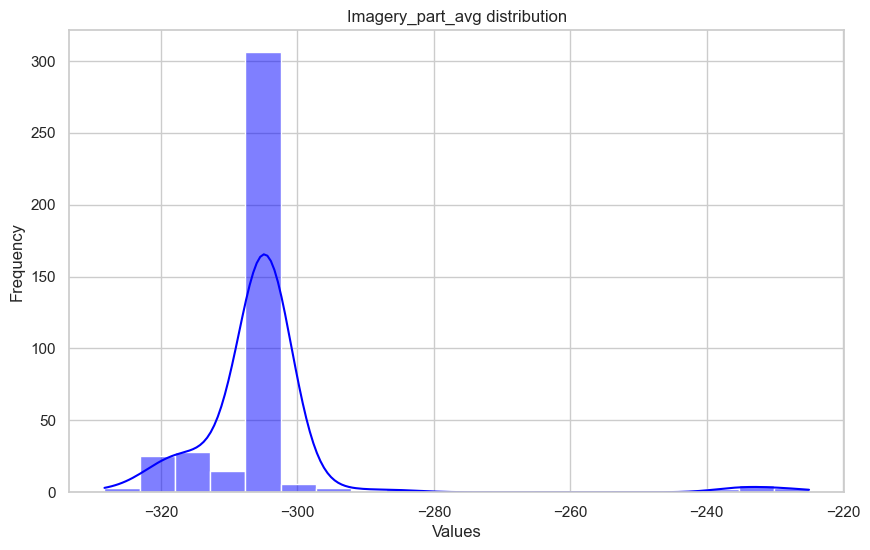

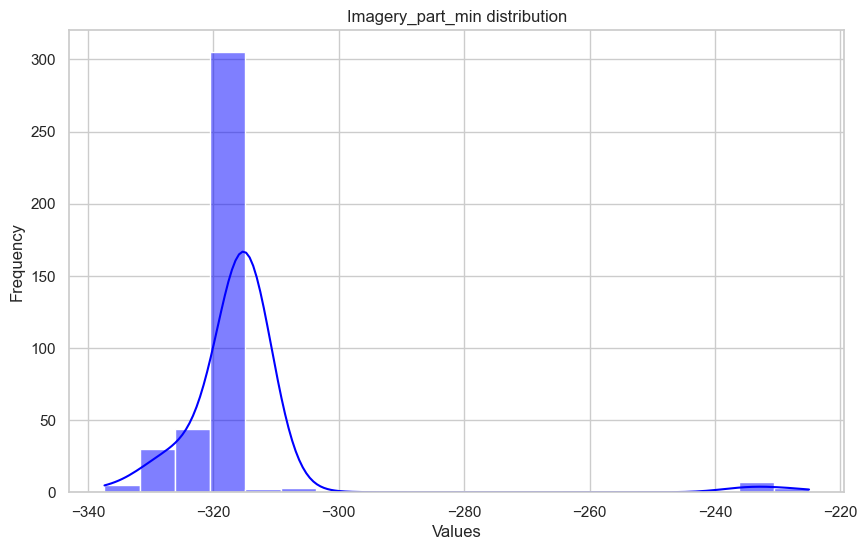

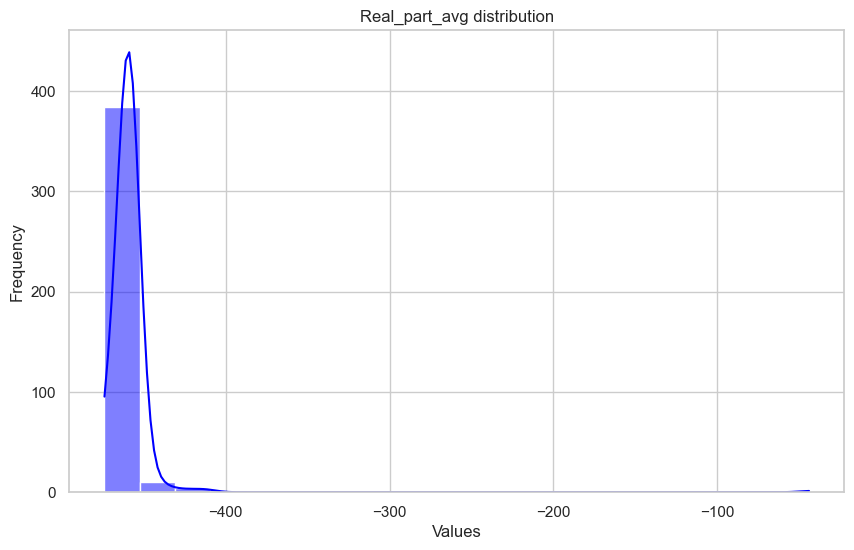

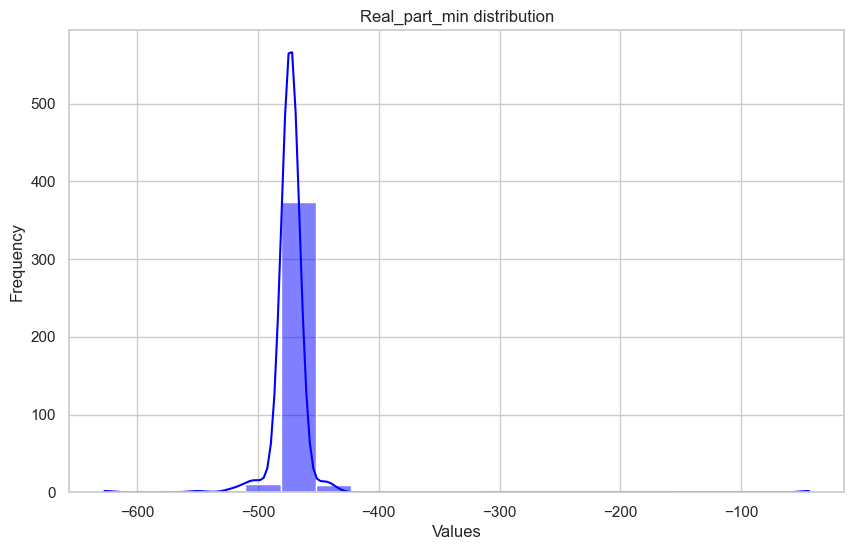

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo general para gráficos
sns.set(style="whitegrid")

# 1. Distribution of 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(exasens_data['Age'], bins=20, kde=True, color="green")
plt.title('Age distribution')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency (nº of Patients)')
plt.show()

# 2. Distribution of 'Diagnosis'
plt.figure(figsize=(8, 5))
sns.countplot(data=exasens_data, x='Diagnosis', palette="viridis")
plt.title('Diagnosis distribution')
plt.xlabel('Types of Diagnosis')
plt.ylabel('Count (nº of Patients)')
plt.show()

# 3. Distribution of 'Gender'
plt.figure(figsize=(6, 4))
sns.countplot(data=exasens_data, x='Gender', palette="pastel")
plt.title('Gender distribution')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count (nº of Patients)')
plt.show()

# 4. Distribution of 'Smoking'
plt.figure(figsize=(8, 5))
sns.countplot(data=exasens_data, x='Smoking', palette="magma")
plt.title('Smoking levels distribution')
plt.xlabel('Smoking level')
plt.ylabel('Count (nº of Patients)')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(exasens_data['Imagery_part_avg'], bins=20, kde=True, color="blue")
plt.title('Imagery_part_avg distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(exasens_data['Imagery_part_min'], bins=20, kde=True, color="blue")
plt.title('Imagery_part_min distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(exasens_data['Real_part_avg'], bins=20, kde=True, color="blue")
plt.title('Real_part_avg distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(exasens_data['Real_part_min'], bins=20, kde=True, color="blue")
plt.title('Real_part_min distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

## 4. Correlation Analysis and Relationships between variables
This step involves several key activities to explore the relationships between variables and understand their interdependencies, which can help formulate hypotheses for building predictive models

### 4.1. Matrix Correlation
The correlation between the numerical variables in the dataset is calculated using a correlation matrix.

Columnas no numéricas: Index(['Diagnosis', 'ID'], dtype='object')


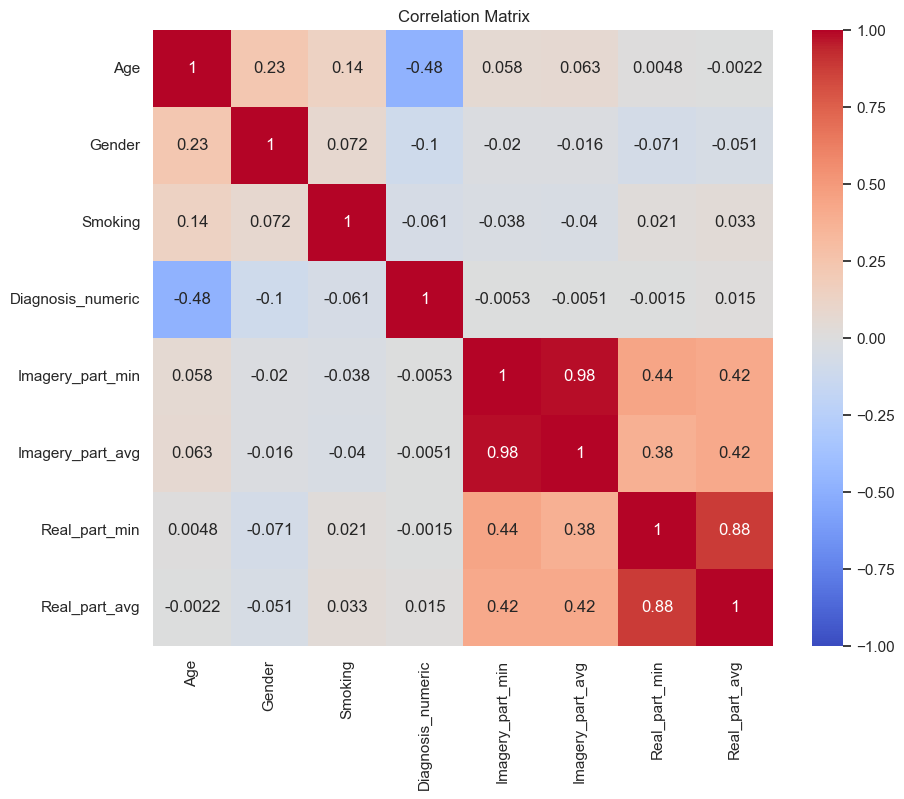

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
# file_path_csv = "Exasens_Kaggle.csv"  # Cambia la ruta si es necesario
# exasens_data = pd.read_csv(file_path_csv)

# Identificar columnas no numéricas
non_numeric_columns = exasens_data.select_dtypes(exclude=['float64', 'int64']).columns
print("Columnas no numéricas:", non_numeric_columns)

# Convertir Diagnosis a valores numéricos, ya que la otra no numérica que nos sale es el ID y no se necesita
exasens_data['Diagnosis_numeric'] = exasens_data['Diagnosis'].astype('category').cat.codes

# Seleccionar columnas relevantes (incluyendo Diagnosis numérica y atributos adicionales)
correlation_data = exasens_data[['Age', 'Gender', 'Smoking', 'Diagnosis_numeric', 'Imagery_part_min', 'Imagery_part_avg', 'Real_part_min', 'Real_part_avg']]

# Calcular la matriz de correlación
correlation_matrix = correlation_data.corr()

# Visualizar la matriz de correlación como un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0)
plt.title("Correlation Matrix")
plt.show()

### 4.2. Analyzing Relationships Between Categorical Variables
For categorical variables like Gender or Smoking, you can evaluate how they are distributed in relation to other variables (e.g., Diagnosis), using plots like boxplots or bar plots.

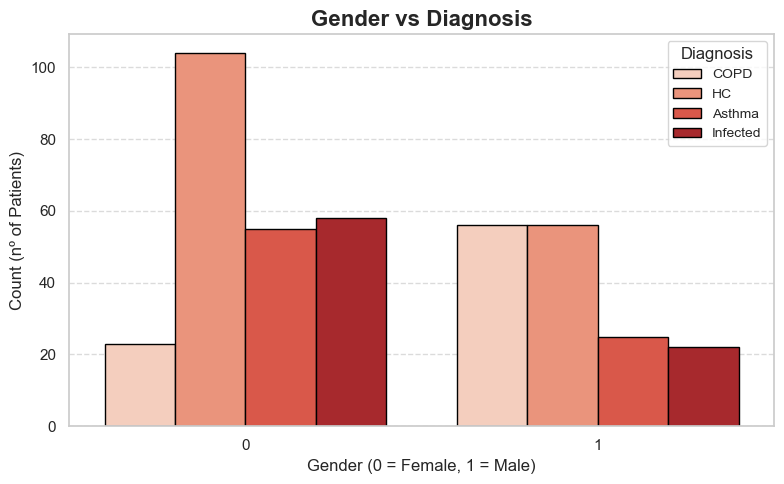

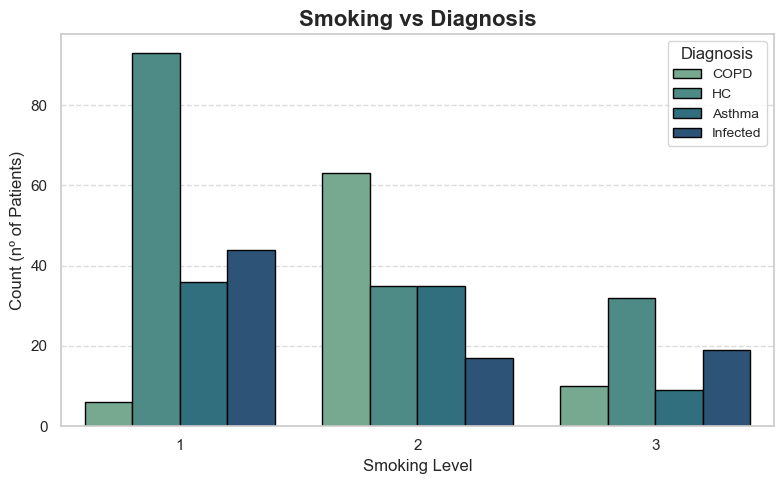

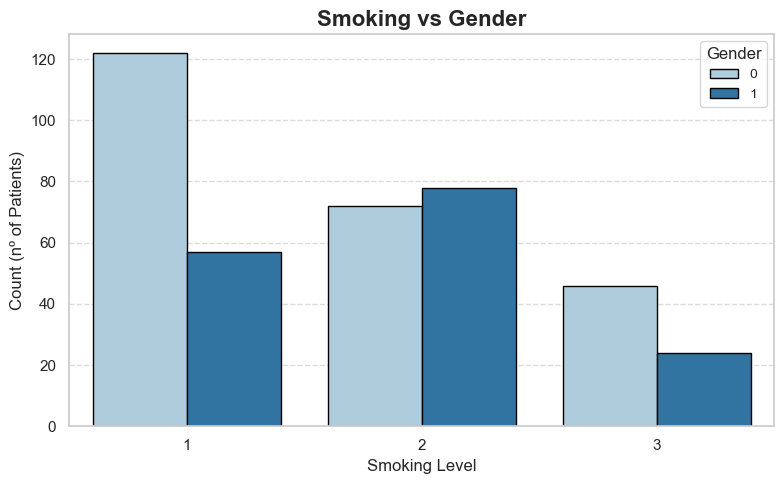

In [138]:
# Gender vs Diagnosis with a smooth color palette (coolwarm)
plt.figure(figsize=(8, 5))
sns.countplot(data=exasens_data, x='Gender', hue='Diagnosis', palette="Reds", edgecolor='black')
plt.title('Gender vs Diagnosis', fontsize=16, fontweight='bold')
plt.xlabel('Gender (0 = Female, 1 = Male)', fontsize=12)
plt.ylabel('Count (nº of Patients)', fontsize=12)
plt.legend(title='Diagnosis', loc='upper right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Smoking vs Diagnosis with a different but complementary color palette (crest)
plt.figure(figsize=(8, 5))
sns.countplot(data=exasens_data, x='Smoking', hue='Diagnosis', palette="crest", edgecolor='black')
plt.title('Smoking vs Diagnosis', fontsize=16, fontweight='bold')
plt.xlabel('Smoking Level', fontsize=12)
plt.ylabel('Count (nº of Patients)', fontsize=12)
plt.legend(title='Diagnosis', loc='upper right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=exasens_data, x='Smoking', hue='Gender', palette="Paired", edgecolor='black')
plt.title('Smoking vs Gender', fontsize=16, fontweight='bold')
plt.xlabel('Smoking Level', fontsize=12)
plt.ylabel('Count (nº of Patients)', fontsize=12)
plt.legend(title='Gender', loc='upper right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 4.3. Analyzing Non-Linear Relationships
Some relationships may be non-linear. You can use scatter plots and techniques like polynomial regression or Kendall Tau to detect non-linear correlations or dependencies.

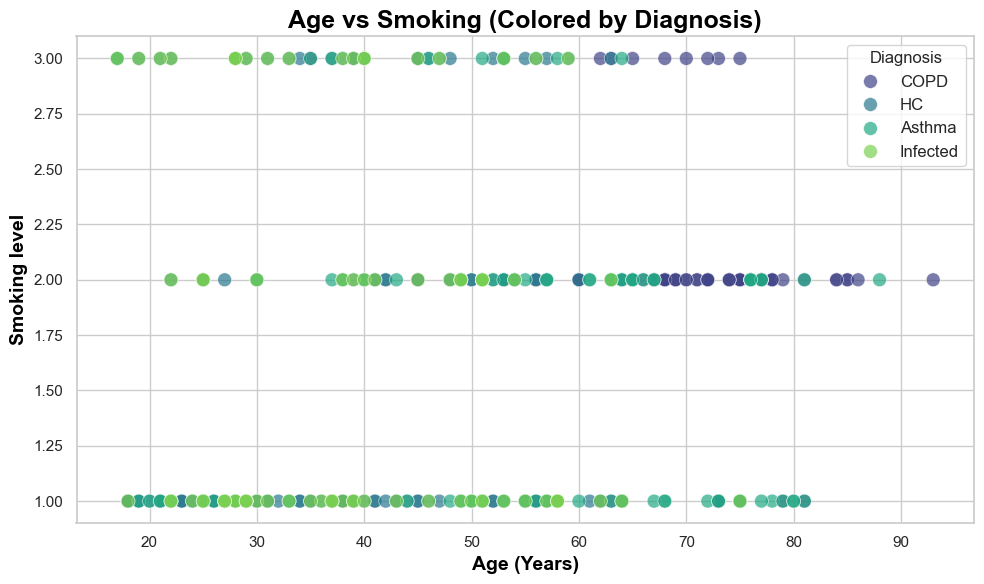

In [119]:
plt.figure(figsize=(10, 6))

# Scatter plot with improved aesthetics and a smooth color palette (viridis)
sns.scatterplot(data=exasens_data, x='Age', y='Smoking', hue='Diagnosis', palette="viridis", s=100, alpha=0.7, edgecolor='w', linewidth=0.5)

# Adding titles and labels with better font size and weight
plt.title('Age vs Smoking (Colored by Diagnosis)', fontsize=18, fontweight='bold', color='black')
plt.xlabel('Age (Years)', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Smoking level', fontsize=14, fontweight='bold', color='black')

# Adding a color bar for better understanding of the color gradient
plt.legend(title='Diagnosis', loc='upper right', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

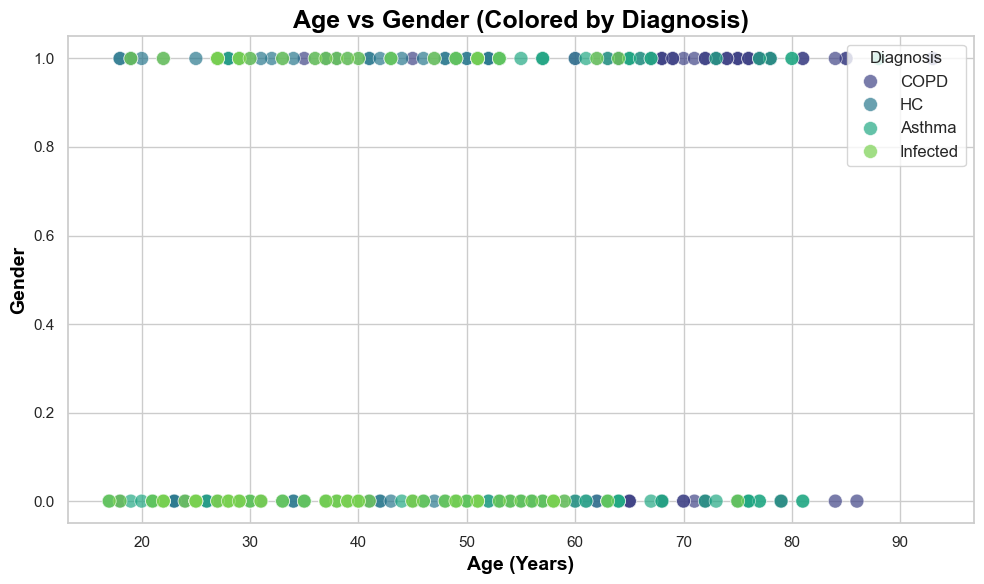

In [140]:
plt.figure(figsize=(10, 6))

# Scatter plot with improved aesthetics and a smooth color palette (viridis)
sns.scatterplot(data=exasens_data, x='Age', y='Gender', hue='Diagnosis', palette="viridis", s=100, alpha=0.7, edgecolor='w', linewidth=0.5)

# Adding titles and labels with better font size and weight
plt.title('Age vs Gender (Colored by Diagnosis)', fontsize=18, fontweight='bold', color='black')
plt.xlabel('Age (Years)', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Gender', fontsize=14, fontweight='bold', color='black')

# Adding a color bar for better understanding of the color gradient
plt.legend(title='Diagnosis', loc='upper right', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

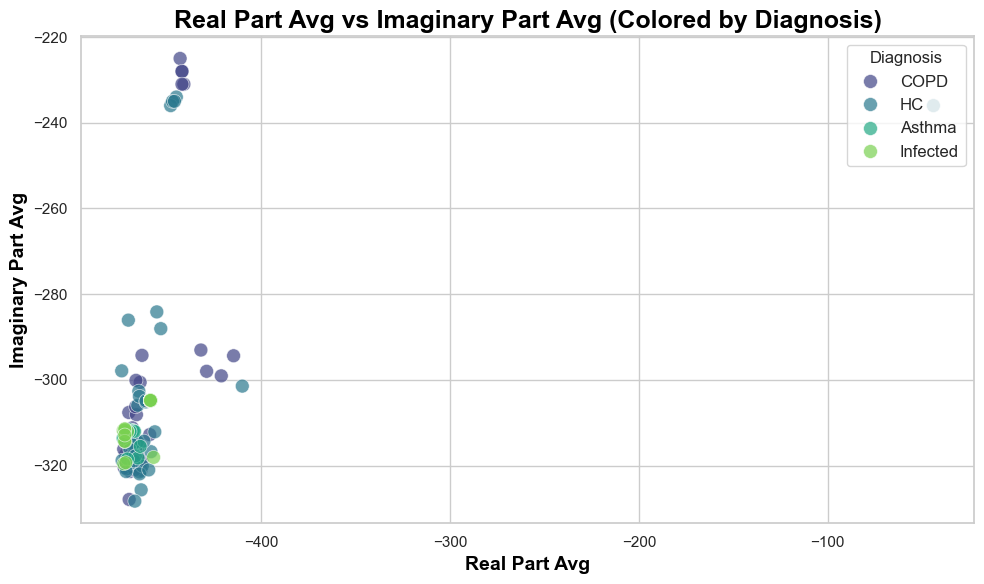

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo general para gráficos
sns.set(style="whitegrid")

# Scatter plot con Real_part_avg e Imaginary_part_avg
plt.figure(figsize=(10, 6))

# Gráfico de dispersión con mejor estética
sns.scatterplot(
    data=exasens_data,
    x='Real_part_avg', 
    y='Imagery_part_avg', 
    hue='Diagnosis', 
    palette="viridis",  # Paleta de colores suave
    s=100,              # Tamaño de los puntos
    alpha=0.7,          # Transparencia de los puntos
    edgecolor='w',      # Borde blanco
    linewidth=0.5       # Grosor del borde
)

# Títulos y etiquetas
plt.title('Real Part Avg vs Imaginary Part Avg (Colored by Diagnosis)', fontsize=18, fontweight='bold', color='black')
plt.xlabel('Real Part Avg', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Imaginary Part Avg', fontsize=14, fontweight='bold', color='black')

# Leyenda con mejor presentación
plt.legend(title='Diagnosis', loc='upper right', fontsize=12)

# Ajustar diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## 5. Outlier detection

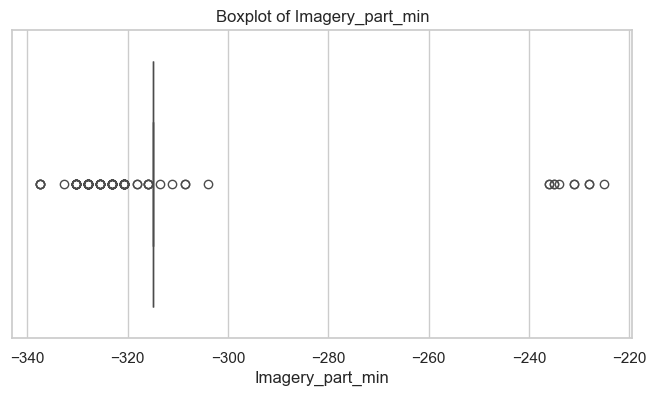

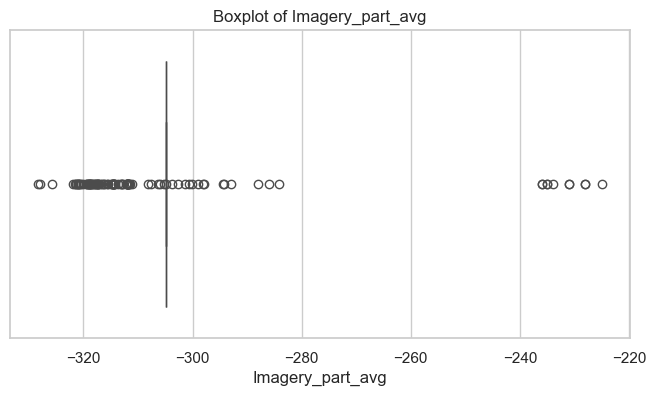

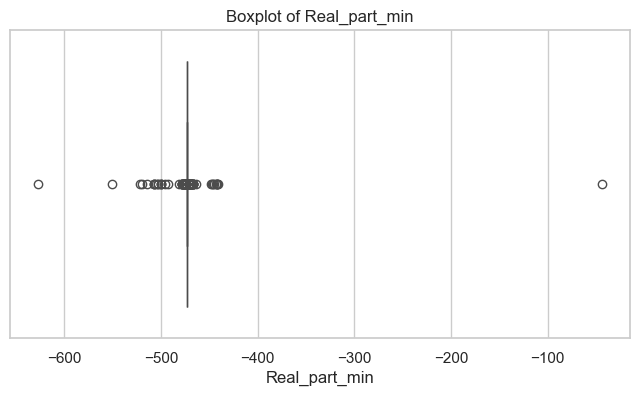

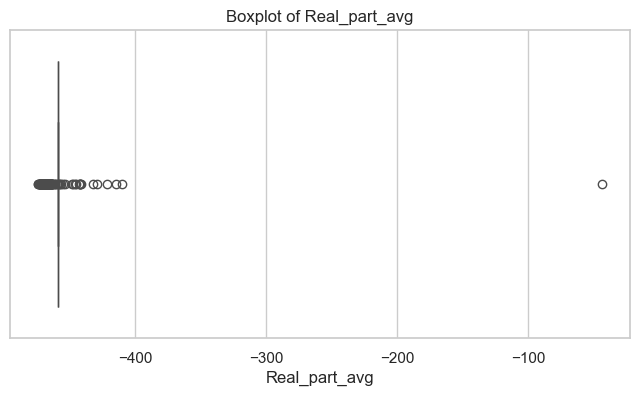

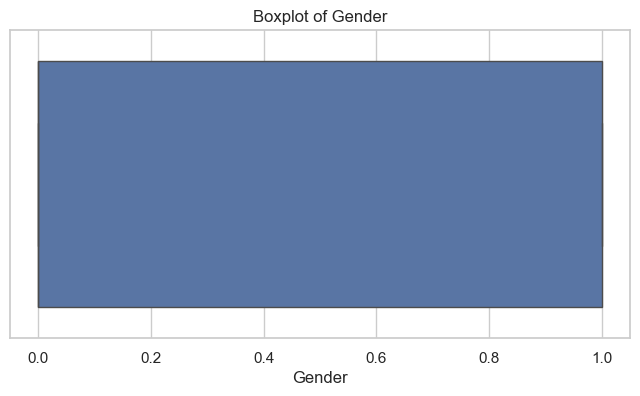

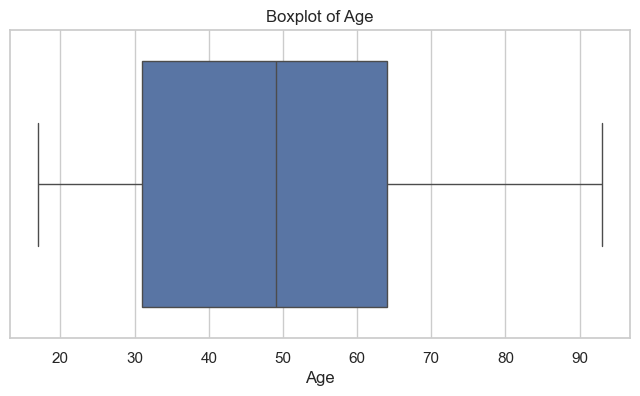

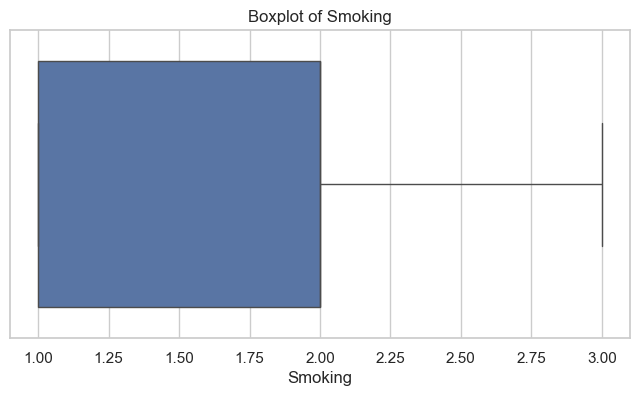

Outliers detected in Imagery_part_min: 100
Outliers detected in Imagery_part_avg: 100
Outliers detected in Real_part_min: 100
Outliers detected in Real_part_avg: 100
Outliers detected in Gender: 0
Outliers detected in Age: 0
Outliers detected in Smoking: 0
Index(['Diagnosis', 'ID', 'Imagery_part_min', 'Imagery_part_avg',
       'Real_part_min', 'Real_part_avg', 'Gender', 'Age', 'Smoking',
       'Diagnosis_numeric'],
      dtype='object')


In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selección de columnas numéricas para detectar valores atípicos
numerical_columns = exasens_data.select_dtypes(include=['float64', 'int64']).columns

# Graficar boxplots para cada columna numérica
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=exasens_data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Identificar valores atípicos (ejemplo usando IQR)
outliers = {}
for column in numerical_columns:
    Q1 = exasens_data[column].quantile(0.25)
    Q3 = exasens_data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers[column] = exasens_data[(exasens_data[column] < (Q1 - 1.5 * IQR)) | 
                                    (exasens_data[column] > (Q3 + 1.5 * IQR))]
    print(f'Outliers detected in {column}: {len(outliers[column])}')

print(exasens_data.columns)